In [69]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [70]:
data = pd.read_csv('../datasets/USvideos.csv', sep=",")

In [71]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [72]:
data.shape

(40949, 16)

In [73]:
data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [74]:
data.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [75]:
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{}- {}'.format(col,temp_null_count))

video_id- 0
trending_date- 0
title- 0
channel_title- 0
category_id- 0
publish_time- 0
tags- 0
views- 0
likes- 0
dislikes- 0
comment_count- 0
thumbnail_link- 0
comments_disabled- 0
ratings_disabled- 0
video_error_or_removed- 0
description- 570


In [76]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


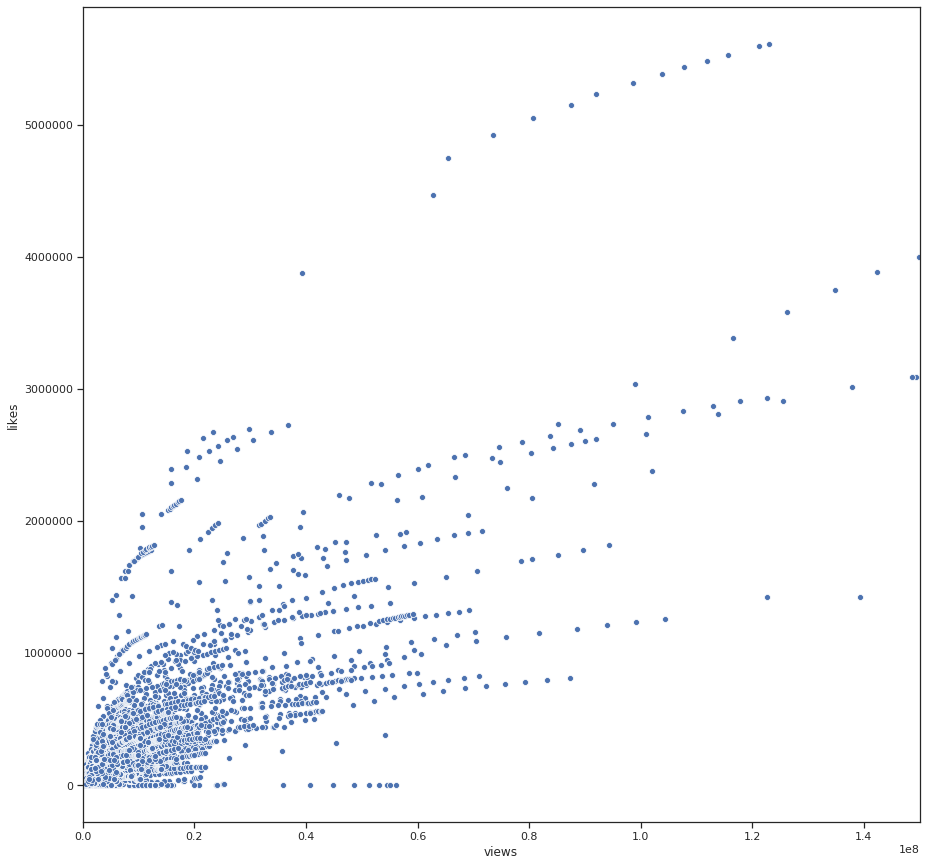

In [77]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set(xlim=(0, 1.5*10**8))
sns.scatterplot(ax=ax, x='views',y='likes',data=data)

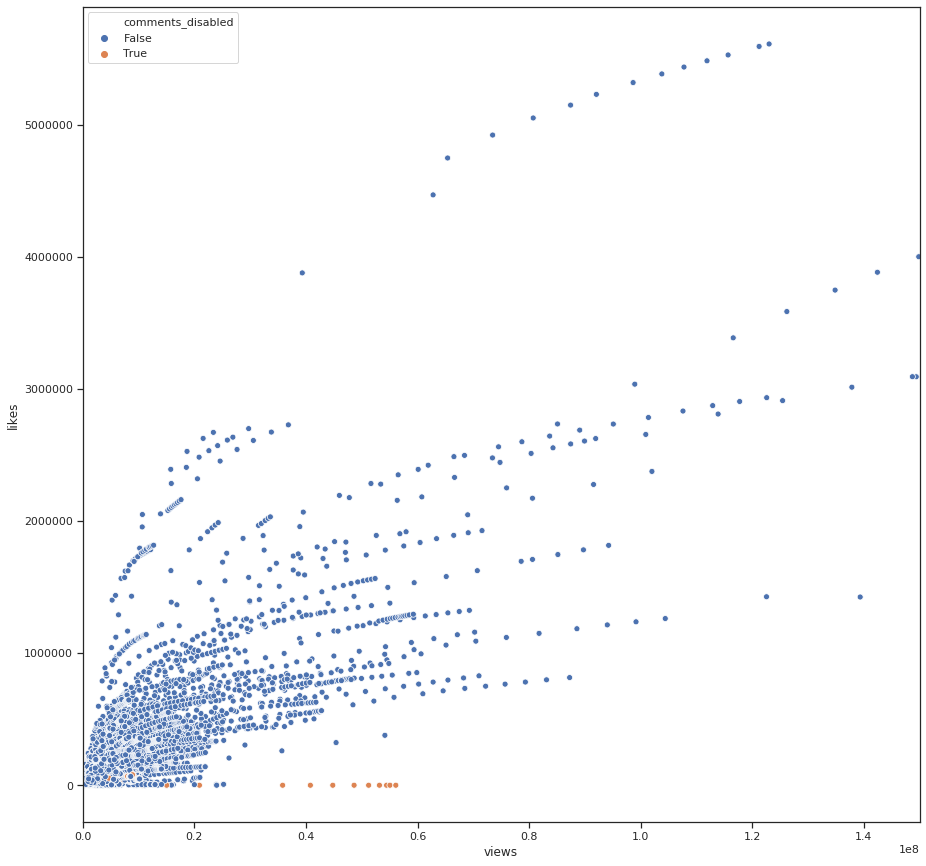

In [78]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set(xlim=(0,1.5*10**8))
sns.scatterplot(ax=ax, x='views', y='likes', data=data, hue='comments_disabled')

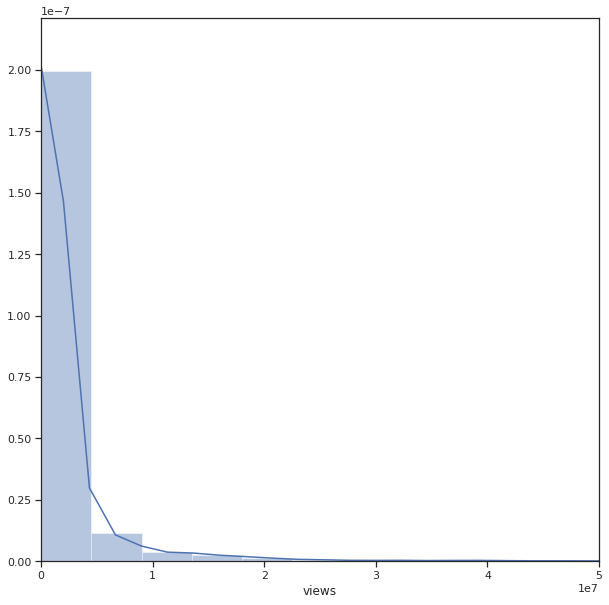

In [79]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set(xlim=(0,0.5*10**8))
sns.distplot(data['views'])

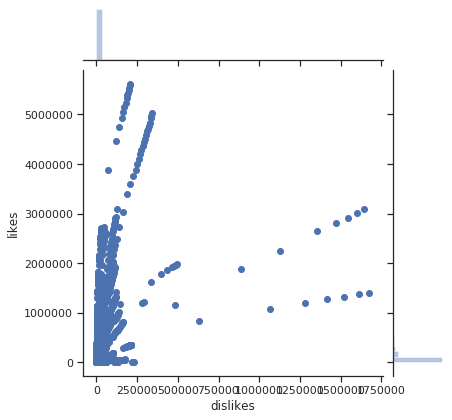

In [87]:
sns.jointplot(x='dislikes', y='likes', data=data)

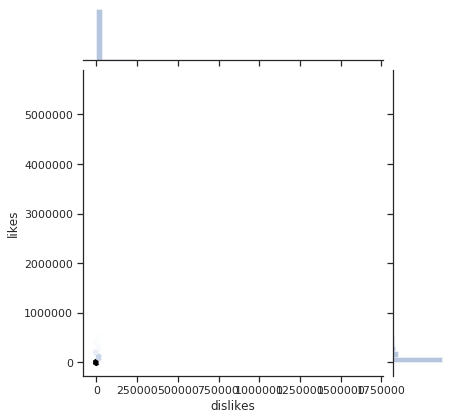

In [86]:
sns.jointplot(x='dislikes', y='likes', data=data, kind="hex")

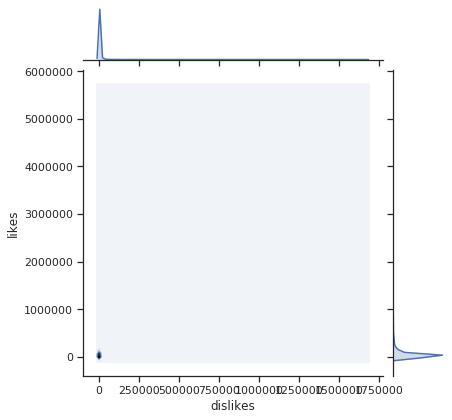

In [88]:
sns.jointplot(x='dislikes', y='likes', data=data, kind="kde")

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

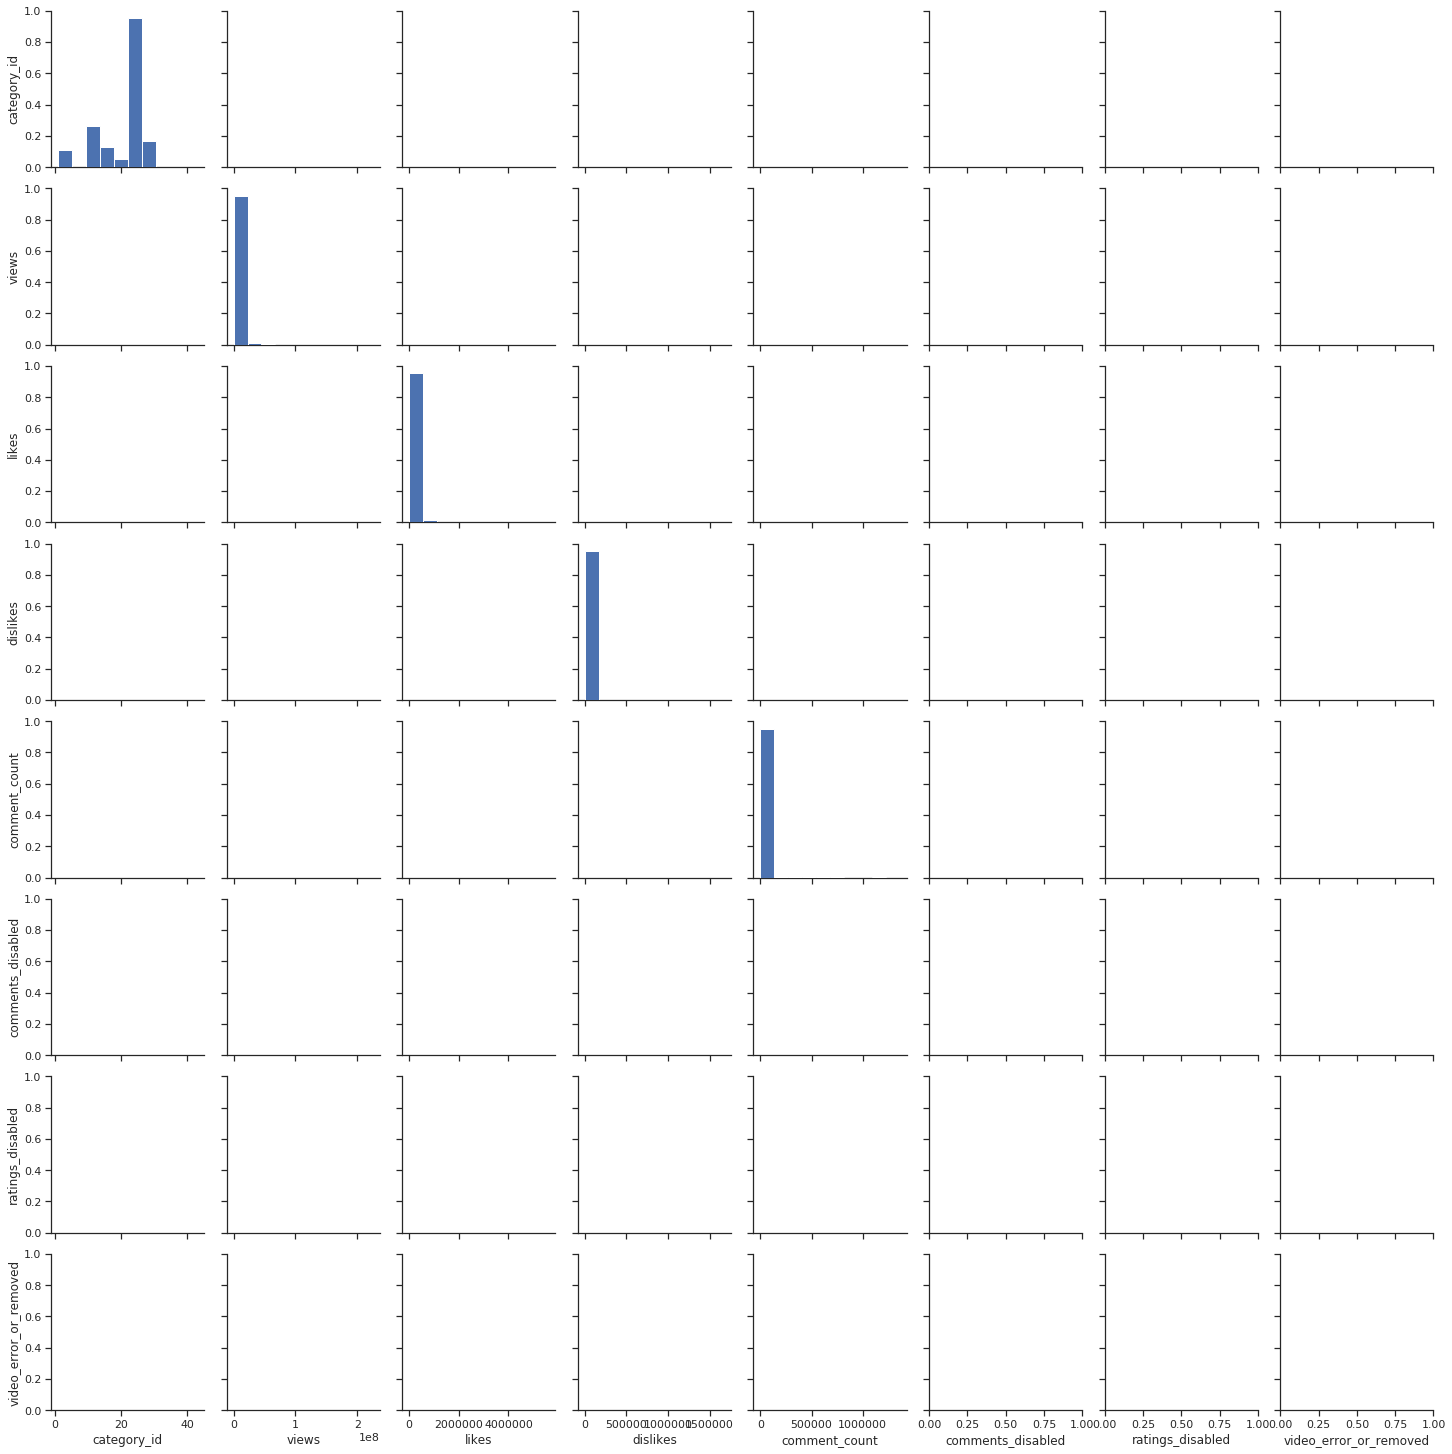

In [89]:
#TODO Fix dataset, erase all ogject data fields
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


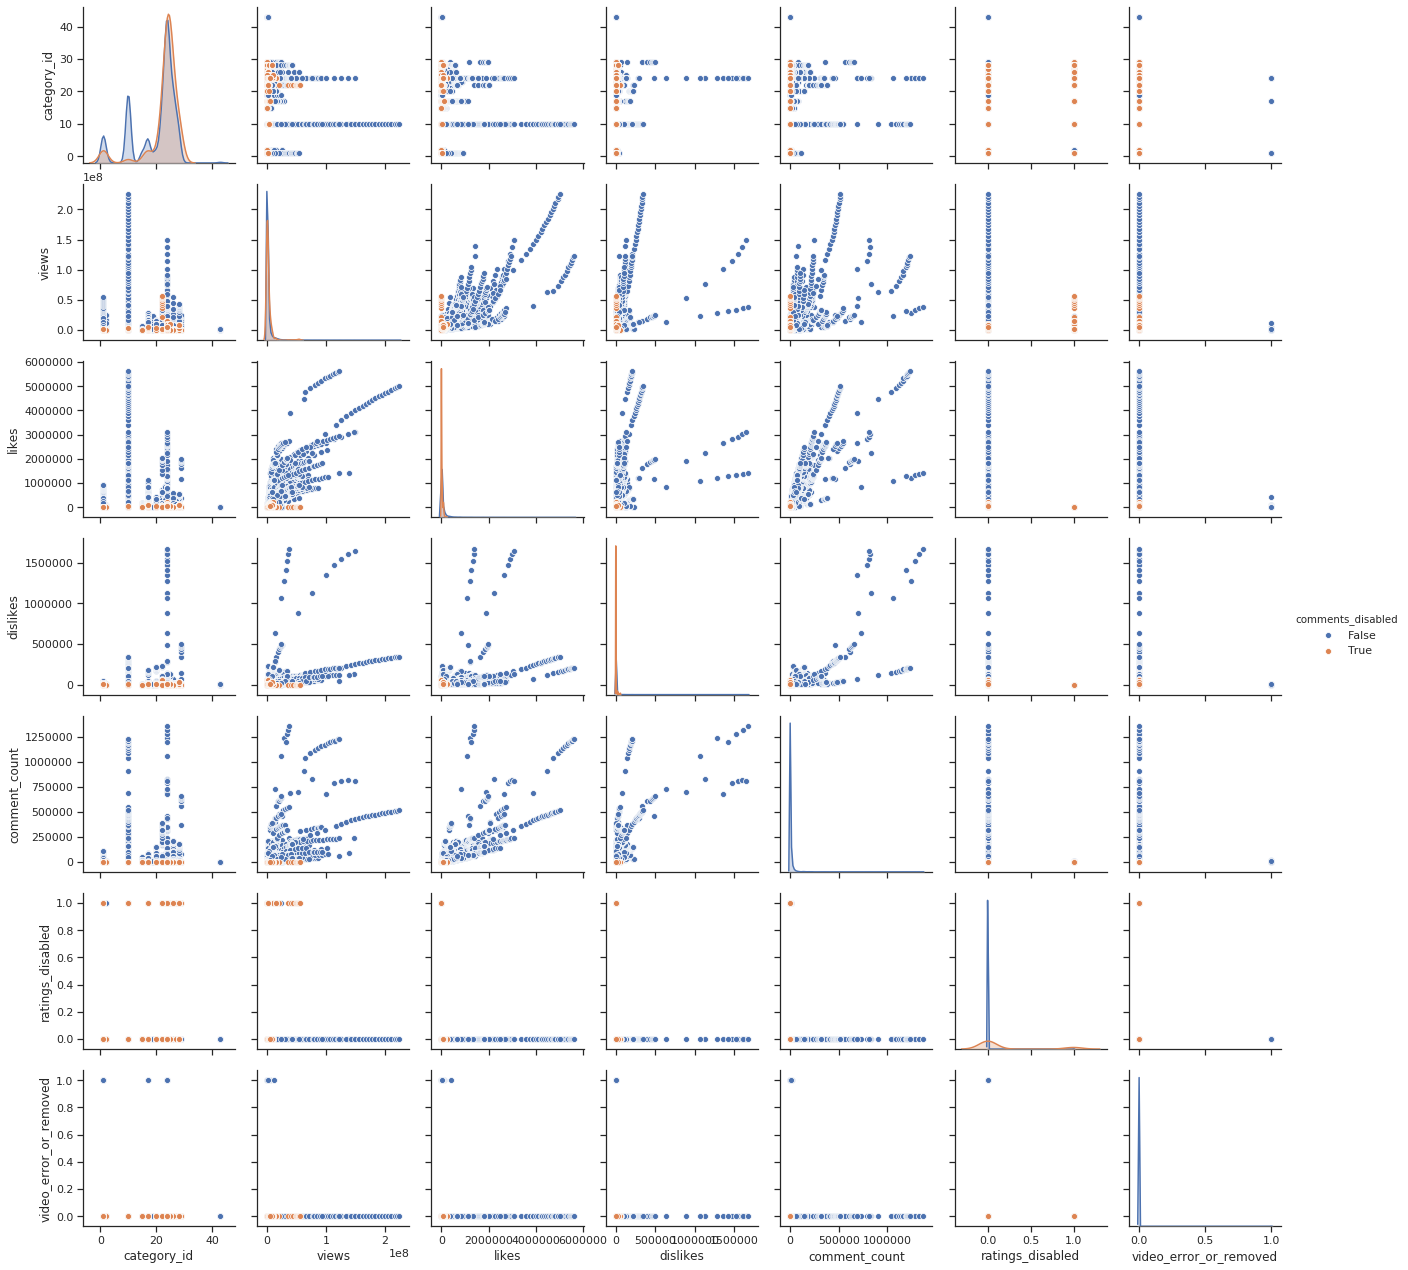

In [16]:
sns.pairplot(data, hue="comments_disabled")

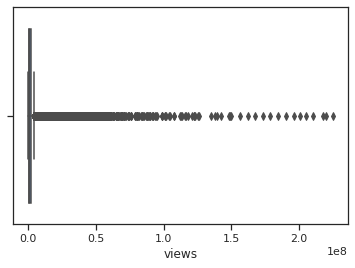

In [27]:
sns.boxplot(x=data['views'])


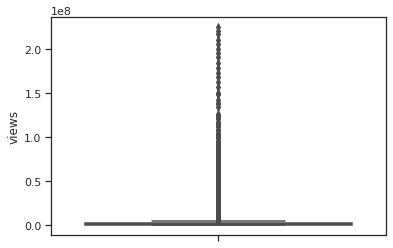

In [22]:
sns.boxplot(y=data['views'])

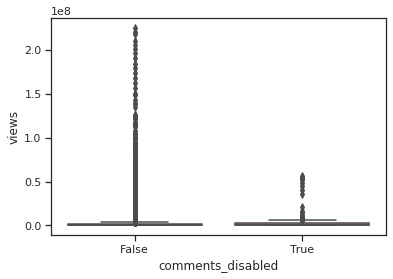

In [20]:
sns.boxplot(x='comments_disabled', y='views', data=data)

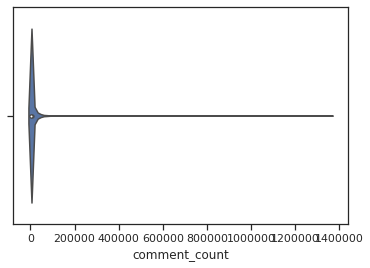

In [30]:
sns.violinplot(x=data['comment_count'])

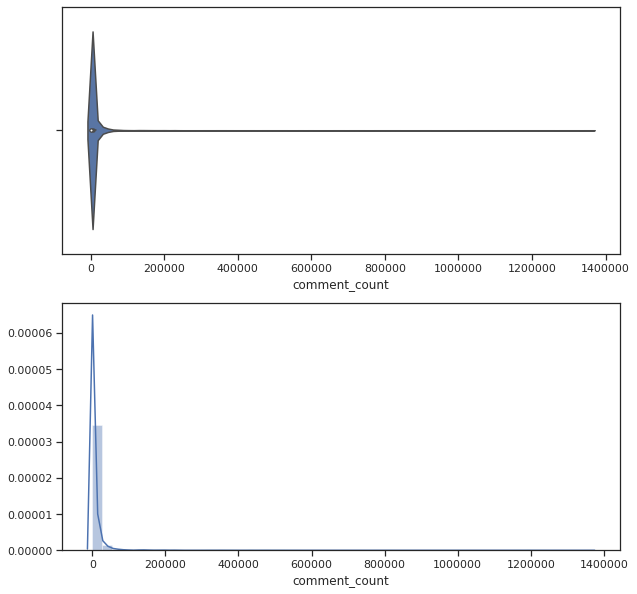

In [32]:

fig, ax = plt.subplots(2, 1, figsize=(10,10))

sns.violinplot(ax=ax[0], x=data['comment_count'])
sns.distplot(data['comment_count'], ax=ax[1])

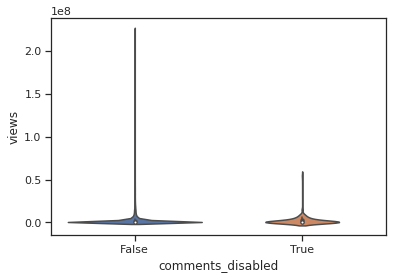

In [34]:
sns.violinplot(x='comments_disabled', y='views', data=data)

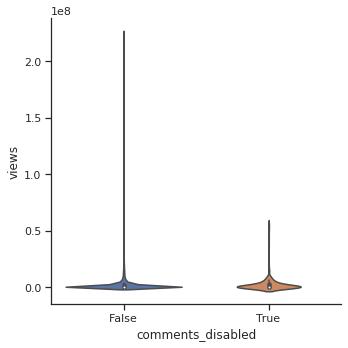

In [35]:
sns.catplot(y='views', x='comments_disabled', data=data, kind="violin", split=True)

In [36]:
data.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


In [37]:
data.corr(method='pearson')

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


In [38]:
data.corr(method='kendall')

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.134824,-0.126356,-0.089573,-0.087364,0.050209,-0.010445,-0.017640
views,-0.134824,1.000000,0.691329,0.680772,0.632967,-0.007929,-0.015963,0.000752
likes,-0.126356,0.691329,1.000000,0.614065,0.715186,-0.065620,-0.090661,0.001630
dislikes,-0.089573,0.680772,0.614065,1.000000,0.662717,-0.026590,-0.090218,0.000611
comment_count,-0.087364,0.632967,0.715186,0.662717,1.000000,-0.173964,-0.071621,-0.004823
comments_disabled,0.050209,-0.007929,-0.065620,-0.026590,-0.173964,1.000000,0.319230,-0.002970
ratings_disabled,-0.010445,-0.015963,-0.090661,-0.090218,-0.071621,0.319230,1.000000,-0.001526
video_error_or_removed,-0.017640,0.000752,0.001630,0.000611,-0.004823,-0.002970,-0.001526,1.000000


In [39]:
data.corr(method='spearman')

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.190188,-0.179136,-0.126461,-0.124302,0.058190,-0.012105,-0.020444
views,-0.190188,1.000000,0.862553,0.854176,0.807619,-0.009711,-0.019551,0.000921
likes,-0.179136,0.862553,1.000000,0.798874,0.878363,-0.080365,-0.111033,0.001996
dislikes,-0.126461,0.854176,0.798874,1.000000,0.838240,-0.032555,-0.110459,0.000748
comment_count,-0.124302,0.807619,0.878363,0.838240,1.000000,-0.213005,-0.087694,-0.005905
comments_disabled,0.058190,-0.009711,-0.080365,-0.032555,-0.213005,1.000000,0.319230,-0.002970
ratings_disabled,-0.012105,-0.019551,-0.111033,-0.110459,-0.087694,0.319230,1.000000,-0.001526
video_error_or_removed,-0.020444,0.000921,0.001996,0.000748,-0.005905,-0.002970,-0.001526,1.000000


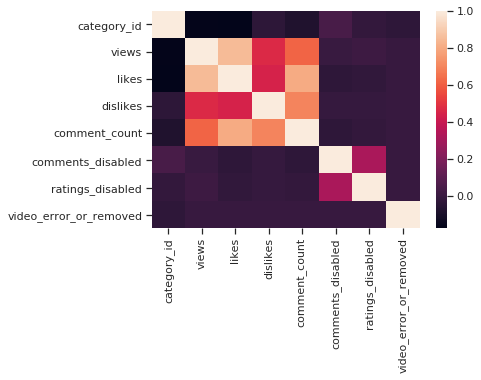

In [40]:
sns.heatmap(data.corr())

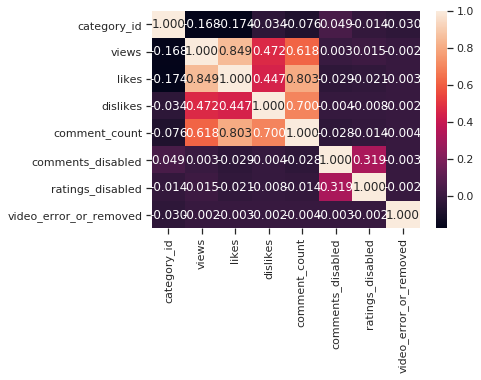

In [41]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

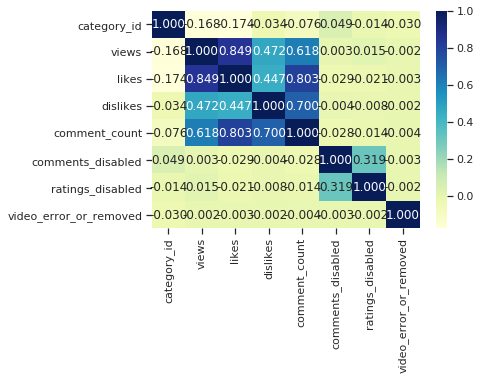

In [42]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

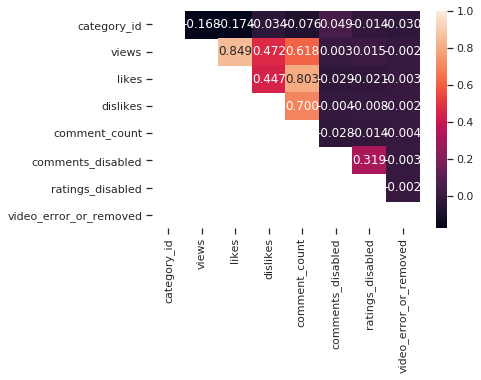

In [43]:

# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

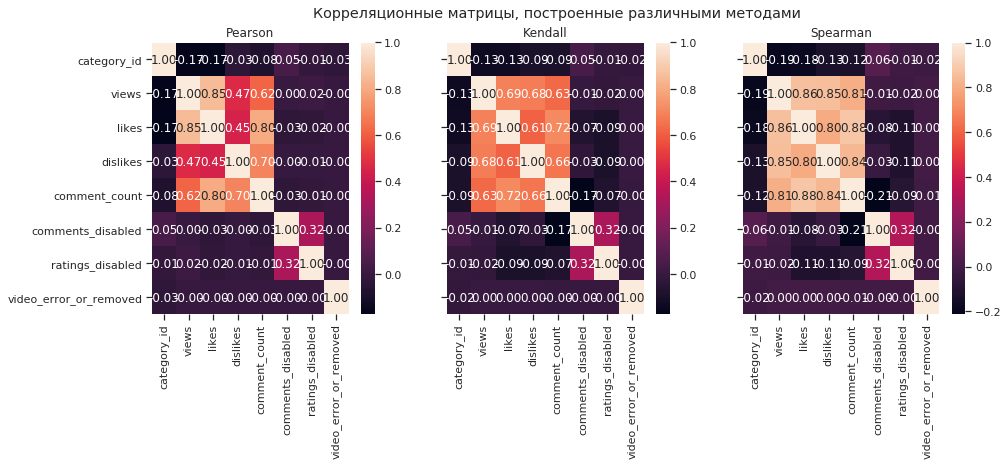

In [44]:

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')
